<a href="https://colab.research.google.com/github/jorge673/ADA-INFORMES-/blob/main/Informe-SubArregloMaximo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de sub-arreglo maximo

>**Entrada:** Un arreglo de n elementos $a=[a_1.....a_n]$
>
>**Salida**: Un sub-arreglo de $a$ tal que la suma de sus elementos sea mayor que los demas sub arreglos.

![image](https://media.geeksforgeeks.org/wp-content/uploads/maximum-subarray-sum-is-7.jpg)

El problema trata de encontrar un sub arreglo contiguo con la suma más grande dentro de un arreglo ($a=[a_1.....a_n]$)

##Aplicaciones

Tiene aplicaciones en muchas áreas como:

>**El analisis de secuancias geonomicas**: Emplea algoritmos de subarreglo máximo para identificar segmentos biológicos importantes de secuencias de proteínas.
> 
>**Vision artificial**: los algoritmos de subarreglo máximo se utilizan en imágenes de mapa de bits para detectar el área más brillante de una imagen.


# 2. Descripcion del teorema

In [ ]:
import random
from termcolor import colored
import copy



def MaxSubArrayMid(arr,low,med,high,verbose=False,espaciado=""):

  global GIGA,inf,sup #variables globales para sacar los indice

  imedi=low #indice inferior de la mitad derecha
  smedd=high #indice superior de la mitad izquierda

  suma=0
  izq_max=-10000
  

  if(verbose):#verbose para explicar que es lo que pasa
    print("-----------------------------------------------------")
    print(espaciado+"(Funcion MaxSubArrayMid)\n")
    espaciado="   "+espaciado[:-2] #  ayuda a la estetica para que se explique mejor
    print(espaciado+"Sub-array =",arr[low:high+1])

  for i in range(med, low-1, -1):
        suma = suma + arr[i]
 
        if (suma > izq_max):
            imedi=i #se asigna el indice
            izq_max = suma

  if(verbose):
    print("\n"+espaciado+"MITAD IZQUIRDA:")
    print("   "+espaciado+"["+str(arr[:imedi])[1:-1]+", "+colored(f"{str(arr[imedi:med+1])[1:-1]}","red")+", "+str(arr[med+1:])[1:-1]+"]")
    print("   "+espaciado+"Maximo izquierdo =", izq_max)

  suma=0
  der_max=-10000

  for i in range(med+1,high+1):
        suma = suma + arr[i]
        
        if (suma > der_max):
            smedd = i #se asigna el indice
            der_max = suma  

  if(verbose):# se muestra la matris si vervobose es verdadero
    print("\n"+espaciado+"MITAD DERECHA:")
    print("   "+espaciado+"["+str(arr[:med+1])[1:-1]+", "+colored(f"{str(arr[med+1:smedd+1])[1:-1]}","blue")+", "+str(arr[smedd+1:])[1:-1]+"]")
    print("   "+espaciado+"Maximo derecho =", der_max,"\n")
    
    print(espaciado+"MITAD DERECHA + MITAD IZQUIRDA :")


    print("   "+espaciado+"["+str(arr[:imedi])[1:-1], end=", ")

    if(arr[imedi:med+1] != []):
      print(colored(f"{str(arr[imedi:med+1])[1:-1]}","red"),end=", ")

    if(arr[med+1:smedd+1] != []):
      print(", "+colored(f"{str(arr[med+1:smedd+1])[1:-1]}","blue"),end="")

    print(", "+str(arr[smedd+1:])[1:-1]+"]")


    print("   "+espaciado+"Maximo =",der_max+izq_max)
    print("-----------------------------------------------------")

  if(GIGA < der_max+izq_max): #GIGA ayuda a comparar todos los sub arreglos
    GIGA = der_max+izq_max
    inf=imedi
    sup=smedd

  return der_max+izq_max #se devuelve la suma de los maximos de las 2 mitades


def MaxSubArray(arr,low,high,verbose=False,espaciado=""):
  
  global GIGA,inf,sup #varibles globales que ayudan a sacar el idice
  
  
  linea=espaciado+"└─" #meramente de estetica

  if(verbose and arr != [] ):
    print(linea+"Sub-arreglo:",arr[low:high+1])

  if(low==high):

    if(verbose):
      print(espaciado+"   Es de orden 1\n")

    if(GIGA < arr[low]):#GIGA compara todas las sub matrises
      GIGA = arr[low]
      sup=low
      inf=low

    return arr[low]

  
  elif verbose:
    print("")
    espaciado+="  "

  med=(low+high)//2

  max_izq=MaxSubArray(arr,low,med,verbose,espaciado)
  max_der=MaxSubArray(arr,med+1,high,verbose,espaciado)
  max_mid=MaxSubArrayMid(arr,low,med,high,verbose,linea)

  return max(max_izq,max_der,max_mid)
    
a = [1,2,3,4,5,6,7]
n = len(a)
GIGA=-10000000 #antes de la llamada a GIGA se le asigna el menor numero posible si no se hace aun asi da el maximo pero no da el indice

print("La Mayor suma es =",MaxSubArray(a,0,n-1,False,""))
print("sub-arreglo ="+"["+str(a[:inf])[1:-1]+", "+colored(f"{str(a[inf:sup+1])[1:-1]}","green")+", "+str(a[sup+1:])[1:-1]+"]")


La Mayor suma es = 28
sub-arreglo =[, 1, 2, 3, 4, 5, 6, 7, ]


##MaxSubArray

El algoritmo () es muy parecido a marge-sort, ya que usa el paradigma Divide y conquista, este recibe un arreglo `a` con una cantidad de $n$ elementos, recibe el índice inferior `low` del arreglo que seria 0 en la primera iteración y la variable `high` que es el índice superior del arreglo ósea `n`.

 1. Si `low = high` retorna el arreglo, ya que seria de orden 1.

 2. Deduce el índice que está en la mitad (`(low+high)//2`) luego se genera: 
>`max_izq` = MaxSubArray desde el indice inferior hasta el de la mitad,
>
>`max_der` = MaxSubArray desde el indice medio hasta el superior
>
>`max_mid` = MaxSubArrayMid desde el incice inferior hasta el superior el arrelgo

luego compara estos 3 y retorna el mayor

##MaxSubArrayMid
esta función recibe 4 parámetros que serian **( `arr` El arreglo ; `low` indice inferior ; `med` indice medio ; `high` indice superior )**

La función calcula los sub-arreglos con tamaño $n/2$ con $n$ el largo de `arr` primero calcula la suma la mitad izquierda del arreglo (`low` hasta `med`), luego de la mitad derecha (`med` hasta `hight`) y al final retorna la suma de ambos máximos

#**3. Tiempo de ejecucion**



##Teorema

>*El agloritmo **MaxSubArrayMid** tiene un tiempo de ejecucion de $O(nlog(n))$*

##Prueba del algoritmo

Como se menciono antes el algoritmo se parece a MargeSort al usar el paradicma Divide y conquista el cual al igual que este algoritmo tanto en el peor caso como en el mejor caso va hacer la misma cantidad de iteraciones

##Ejemplo

In [ ]:
a = [1,2,3,4,5]
n = len(a)
GIGA=-10000000
print("La Mayor suma es =",MaxSubArray(a,0,n-1,True))
print("Indice inicial :",inf,"\nIndice final:",sup)
print("sub-arreglo ="+"["+str(a[:inf])[1:-1]+", "+colored(f"{str(a[inf:sup+1])[1:-1]}","green")+", "+str(a[sup+1:])[1:-1]+"]")

└─Sub-arreglo: [1, 2, 3, 4, 5]

  └─Sub-arreglo: [1, 2, 3]

    └─Sub-arreglo: [1, 2]

      └─Sub-arreglo: [1]
         Es de orden 1

      └─Sub-arreglo: [2]
         Es de orden 1

-----------------------------------------------------
    └─(Funcion MaxSubArrayMid)

       Sub-array = [1, 2]

       MITAD IZQUIRDA:
          [, 1, 2, 3, 4, 5]
          Maximo izquierdo = 1

       MITAD DERECHA:
          [1, 2, 3, 4, 5]
          Maximo derecho = 2 

       MITAD DERECHA + MITAD IZQUIRDA :
          [, 1, , 2, 3, 4, 5]
          Maximo = 3
-----------------------------------------------------
    └─Sub-arreglo: [3]
       Es de orden 1

-----------------------------------------------------
  └─(Funcion MaxSubArrayMid)

     Sub-array = [1, 2, 3]

     MITAD IZQUIRDA:
        [, 1, 2, 3, 4, 5]
        Maximo izquierdo = 3

     MITAD DERECHA:
        [1, 2, 3, 4, 5]
        Maximo derecho = 3 

     MITAD DERECHA + MITAD IZQUIRDA :
        [, 1, 2, , 3, 4, 5]
        Maximo = 6
---

A pesar de que a simple vista se sabe cuál es el sub arreglo más grande, el algoritmo aun así hace todo el proceso de recursión, este se divide en 2 mitades de largo $n/2$ y hace el trabajo de MaxSubArray a cada una de estas.

Luego MaxSubArrayMid el cual tiene complejidad $O(n^2)$ se le entrega el arreglo completo para que saque la suma total del arreglo.

Utilizando la relación de recurrencia nos daría que:

$$T(n)=2T(\frac{n}{2})+O(n^2)$$


y utilizando el teorema maestro nos da que la complejidad del algoritmo da:

$$O(nlog(n))$$



#4. Correctitud


##Propiedad invariable de bucle:

>"***en cada una de las iteracion MaxSubArrayMid el algoritmo busca la mayor suma de la dos mitades y retorna ambas sumadas***"

**Inicialización**: Al iniciar el algoritmo ambos ciclos empieza en el mismo punto

**Mantención**: Ambos irán sumando respectivamente dependiendo su mitad (si es la izquierda sumará hacia la izquierda y si va a la derecha sumará hacia la derecha).

**Finalización**: Se sacan los máximos de ambas mitades y se suman 

##Inducción matemática:

>"***P(n) retorna un arreglo de n elementos Caso Base***"

Cuando $n = 1$, MaxSubArray retorna el elemento sin realizar ninguna operación, debido a que técnicamente no puede haber más Sub-arreglos.

Paso Inductivo:
Para un arreglo de $n$-elementos se crean 2 sub arreglos de largo $m = n/2$ que se ordenan usando MaxSubArray de manera recursiva, por lo que eventualmente llegara al caso $n = 1$ (Caso Base) para retornar dicho valor.

#5. Experimentacion



##Comparaciones con Kadane, Furza bruta y Divide y conquista

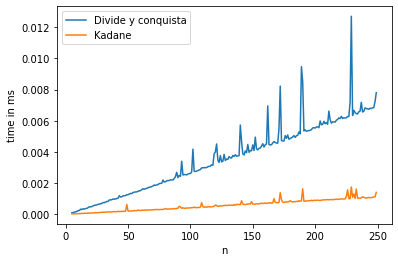

In [ ]:
def kadane(numbers):
    """Find the largest sum of any contiguous subarray."""
    if numbers == []:
        raise ValueError('Empty array has no nonempty subarrays')

    best_sum = float('-inf')
    current_sum = 0
    for x in numbers:
        current_sum = max(x, current_sum + x)   
        best_sum = max(best_sum, current_sum)
    return best_sum

import matplotlib.pyplot as plt
import datetime
from timeit import repeat

xk=[]; yk=[]
xd=[]; yd=[]

for n in range(5,250):

  a = random.sample(range(1, 1000), n)

  t = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)

  xk.append(n)
  yk.append(t)

  t = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a},{0},{len(a)-1})", repeat=1, number=10)

  xd.append(n)
  yd.append(t)


plt.plot(xd,yd)
plt.plot(xk,yk)
plt.legend(["Divide y conquista","Kadane"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

##Analisis

Como podemos apreciar a Kadane tiene un mejor tiempo que Divide y conquista siendo el cual es O(n) esto ocurre, ya que kadane funciona como MaxSubArrayMid cuando recorre las mitades con la diferencia que recorre desde inicio hasta fin en un solo ciclo lo cual reduce mucho los tiempos.

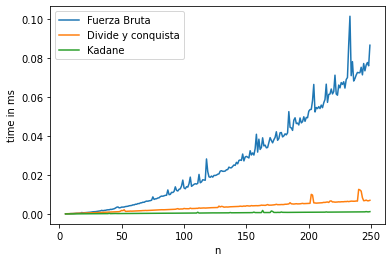

In [ ]:

def fuerzaBruta(arr):
  best_sum = float('-inf')
  current_sum = 0
  for i in range(0,len(a)):
    current_sum=0
    for j in range(i,len(a)):
      current_sum+=arr[j]
      best_sum = max(best_sum, current_sum)

  return best_sum


import matplotlib.pyplot as plt
import datetime
from timeit import repeat

xk=[]; yk=[]
xf=[]; yf=[]
xd=[]; yd=[]

for n in range(5,250):

  a = random.sample(range(1, 1000), n)

  t = repeat(setup="from __main__ import fuerzaBruta", stmt=f"fuerzaBruta({a})", repeat=1, number=10)

  xf.append(n)
  yf.append(t)

for n in range(5,250):

  a = random.sample(range(1, 1000), n)

  t = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)

  xk.append(n)
  yk.append(t)

for n in range(5,250):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a},{0},{len(a)-1})", repeat=1, number=10)

  xd.append(n)
  yd.append(t)


plt.plot(xf,yf)
plt.plot(xd,yd)
plt.plot(xk,yk)
plt.legend(["Fuerza Bruta","Divide y conquista","Kadane"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

##Analisis

Comparando todos los algoritmos para el problema de Sub-arreglo máximo de lo cual podemos deducir que
* Divide y conquista a pesar de ser lento aun así no pasa de la milésima 0.01 en los primeros 250 casos
* Kadane es el más rápido y simple de los 3
* Fuerza Bruta es mucho más lento que los 3 porque su complejidad es $O(n)^2$ al hacer recorrer $n$ veces el arreglo
